In [1]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt


In [6]:
with Path("../10.in").open() as f:
    data = f.read().splitlines()

data = np.array([list(line) for line in data])


In [75]:
testdata = """\
.....
.S-7.
.|.|.
.L-J.
.....""".splitlines()

testdata = np.array([list(line) for line in testdata])


In [76]:
testdata2 = """\
7-F7-
.FJ|7
SJLL7
|F--J
LJ.LJ""".splitlines()

testdata2 = np.array([list(line) for line in testdata2])


The pipes are arranged in a two-dimensional grid of tiles:

- `|` is a vertical pipe connecting north and south.
- `-` is a horizontal pipe connecting east and west.
- `L` is a 90-degree bend connecting north and east.
- `J` is a 90-degree bend connecting north and west.
- `7` is a 90-degree bend connecting south and west.
- `F` is a 90-degree bend connecting south and east.
- `.` is ground; there is no pipe in this tile.
- `S` is the starting position of the animal

## Part I

In [77]:
def evaluate_start(data):
    start_pos = np.argwhere(data == "S")[0]
    next_pos = []

    north = data[start_pos[0]-1, start_pos[1]]
    east = data[start_pos[0], start_pos[1]+1]
    south = data[start_pos[0]+1, start_pos[1]]
    west = data[start_pos[0], start_pos[1]-1]

    if north in ["|", "7", "F"]:
        next_pos.append(start_pos + np.array([-1, 0]))
    if east in ["-", "7", "J"]:
        next_pos.append(start_pos + np.array([0, 1]))
    if south in ["|", "L", "J"]:
        next_pos.append(start_pos + np.array([1, 0]))
    if west in ["-", "L", "F"]:
        next_pos.append(start_pos + np.array([0, -1]))

    return start_pos, np.array(next_pos)


In [79]:
pipes = {
    "|": [[-1, 0], [1, 0]],
    "-": [[0, -1], [0, 1]],
    "L": [[-1, 0], [0, 1]],
    "J": [[-1, 0], [0, -1]],
    "7": [[0, -1], [1, 0]],
    "F": [[0, 1], [1, 0]],
}


In [88]:
def step(data, pos, previous_pos):
    pipe = str(data[pos[0], pos[1]])
    # print(f"Pipe Type: {pipe} at {pos}")
    directions = pipes.get(pipe)
    direction = [d for d in directions if not np.array_equal(d, previous_pos - pos)][0]
    new_pos = pos + direction
    return new_pos


In [103]:
start_pos, start_options = evaluate_start(data)
print(f"Start Pos: {start_pos}\nStart Options: {start_options}")

previous_pos = start_pos
current_pos = start_options[0]

path = [start_pos, current_pos]

steps = 1
while True:
    new_pos = step(data, current_pos, previous_pos)
    path.append(new_pos)
    steps += 1
    if np.array_equal(new_pos, start_pos):
        print(f"Found Start after {steps} steps.")
        print(f"Furthest Distance: {steps/2}")
        break
    previous_pos = current_pos
    current_pos = new_pos


Start Pos: [38 55]
Start Options: [[37 55]
 [39 55]]


Found Start after 14172 steps.
Furthest Distance: 7086.0


## Part II

In [141]:
testdata3 = """\
..........
.S------7.
.|F----7|.
.||OOOO||.
.||OOOO||.
.|L-7F-J|.
.|II||II|.
.L--JL--J.
..........""".splitlines()
testdata3 = np.array([list(line) for line in testdata3])


In [142]:
start_pos, start_options = evaluate_start(testdata3)
print(f"Start Pos: {start_pos}\nStart Options: {start_options}")

previous_pos = start_pos
current_pos = start_options[0]

path = [start_pos, current_pos]

steps = 1
while True:
    new_pos = step(testdata3, current_pos, previous_pos)
    path.append(new_pos)
    steps += 1
    if np.array_equal(new_pos, start_pos):
        print(f"Found Start after {steps} steps.")
        print(f"Furthest Distance: {steps/2}")
        break
    previous_pos = current_pos
    current_pos = new_pos


Start Pos: [1 1]
Start Options: [[1 2]
 [2 1]]
Found Start after 44 steps.
Furthest Distance: 22.0


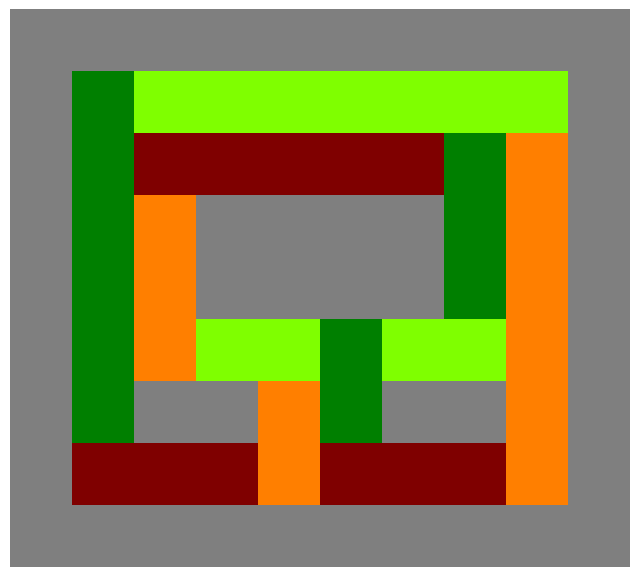

In [143]:
img = np.zeros((*testdata3.shape, 3), dtype=float)

for i in range(1, len(path)):
    prev, pos = path[i-1:i+1]
    direction = pos - prev
    img[pos[0], pos[1]] = [*direction, -1]

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(img/2 + 0.5)


[-1  0]
[[0 1]
 [0 1]
 [0 0]]
[[ 0 -1]
 [ 0 -1]
 [ 0  0]]


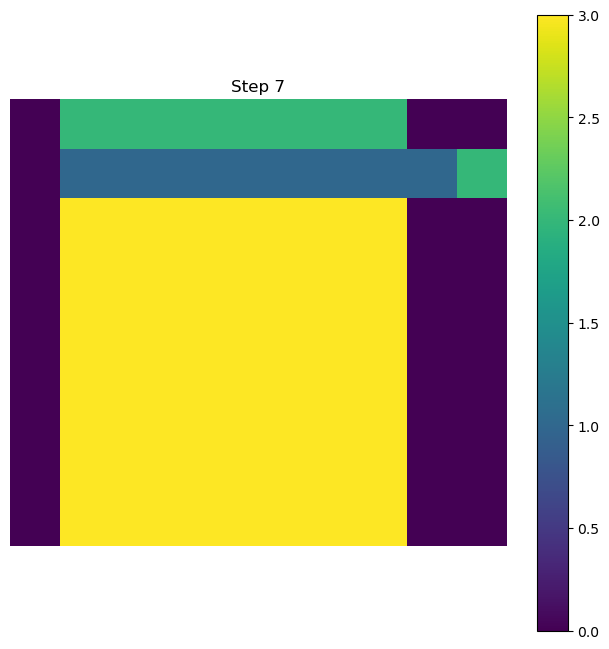

In [155]:

# 0 = nothing
# 1 = on path
# 2 = to the right of path
# 3 = to the left of path

img = np.zeros(testdata3.shape, dtype=float)

for i in range(0, len(path)-1):
    pos, next_pos = path[i:i+2]

    if i == 8:
        break

    img[pos[0], pos[1]] = 1

    direction = pos - next_pos
    right_of_dir = direction @ np.array([[0, -1], [1, 0]])

    # right_of_dir = np.array([direction[1], -direction[0]])



    if direction[0] != 0 and direction[1] != 0:
        inside_directions = [right_of_dir]
        outside_directions = [-right_of_dir]
    else:
        inside_directions = np.array([
            right_of_dir,
            [0, right_of_dir[1]],
            [right_of_dir[0], 0]
        ])
        outside_directions = np.array([-d for d in inside_directions])

    if i == 7:
        print(direction)
        print(inside_directions)
        print(outside_directions)

    for dirs, mark in [[inside_directions, 2], [outside_directions, 3]]:
        for dir in dirs:
            j = 1
            while True:
                new_pos = pos + j * dir
                if new_pos[0] < 0 or new_pos[0] >= testdata3.shape[0] or new_pos[1] < 0 or new_pos[1] >= testdata3.shape[1]:
                    break
                elif img[new_pos[0], new_pos[1]] == 1:
                    break
                else:
                    img[new_pos[0], new_pos[1]] = mark
                j += 1


    if i == 7:
        plt.figure(figsize=(8, 8))
        plt.title(f"Step {i}")
        plt.axis("off")
        im = plt.imshow(img)
        plt.colorbar(im)
        plt.show()
